# El Cens dels Esquirols

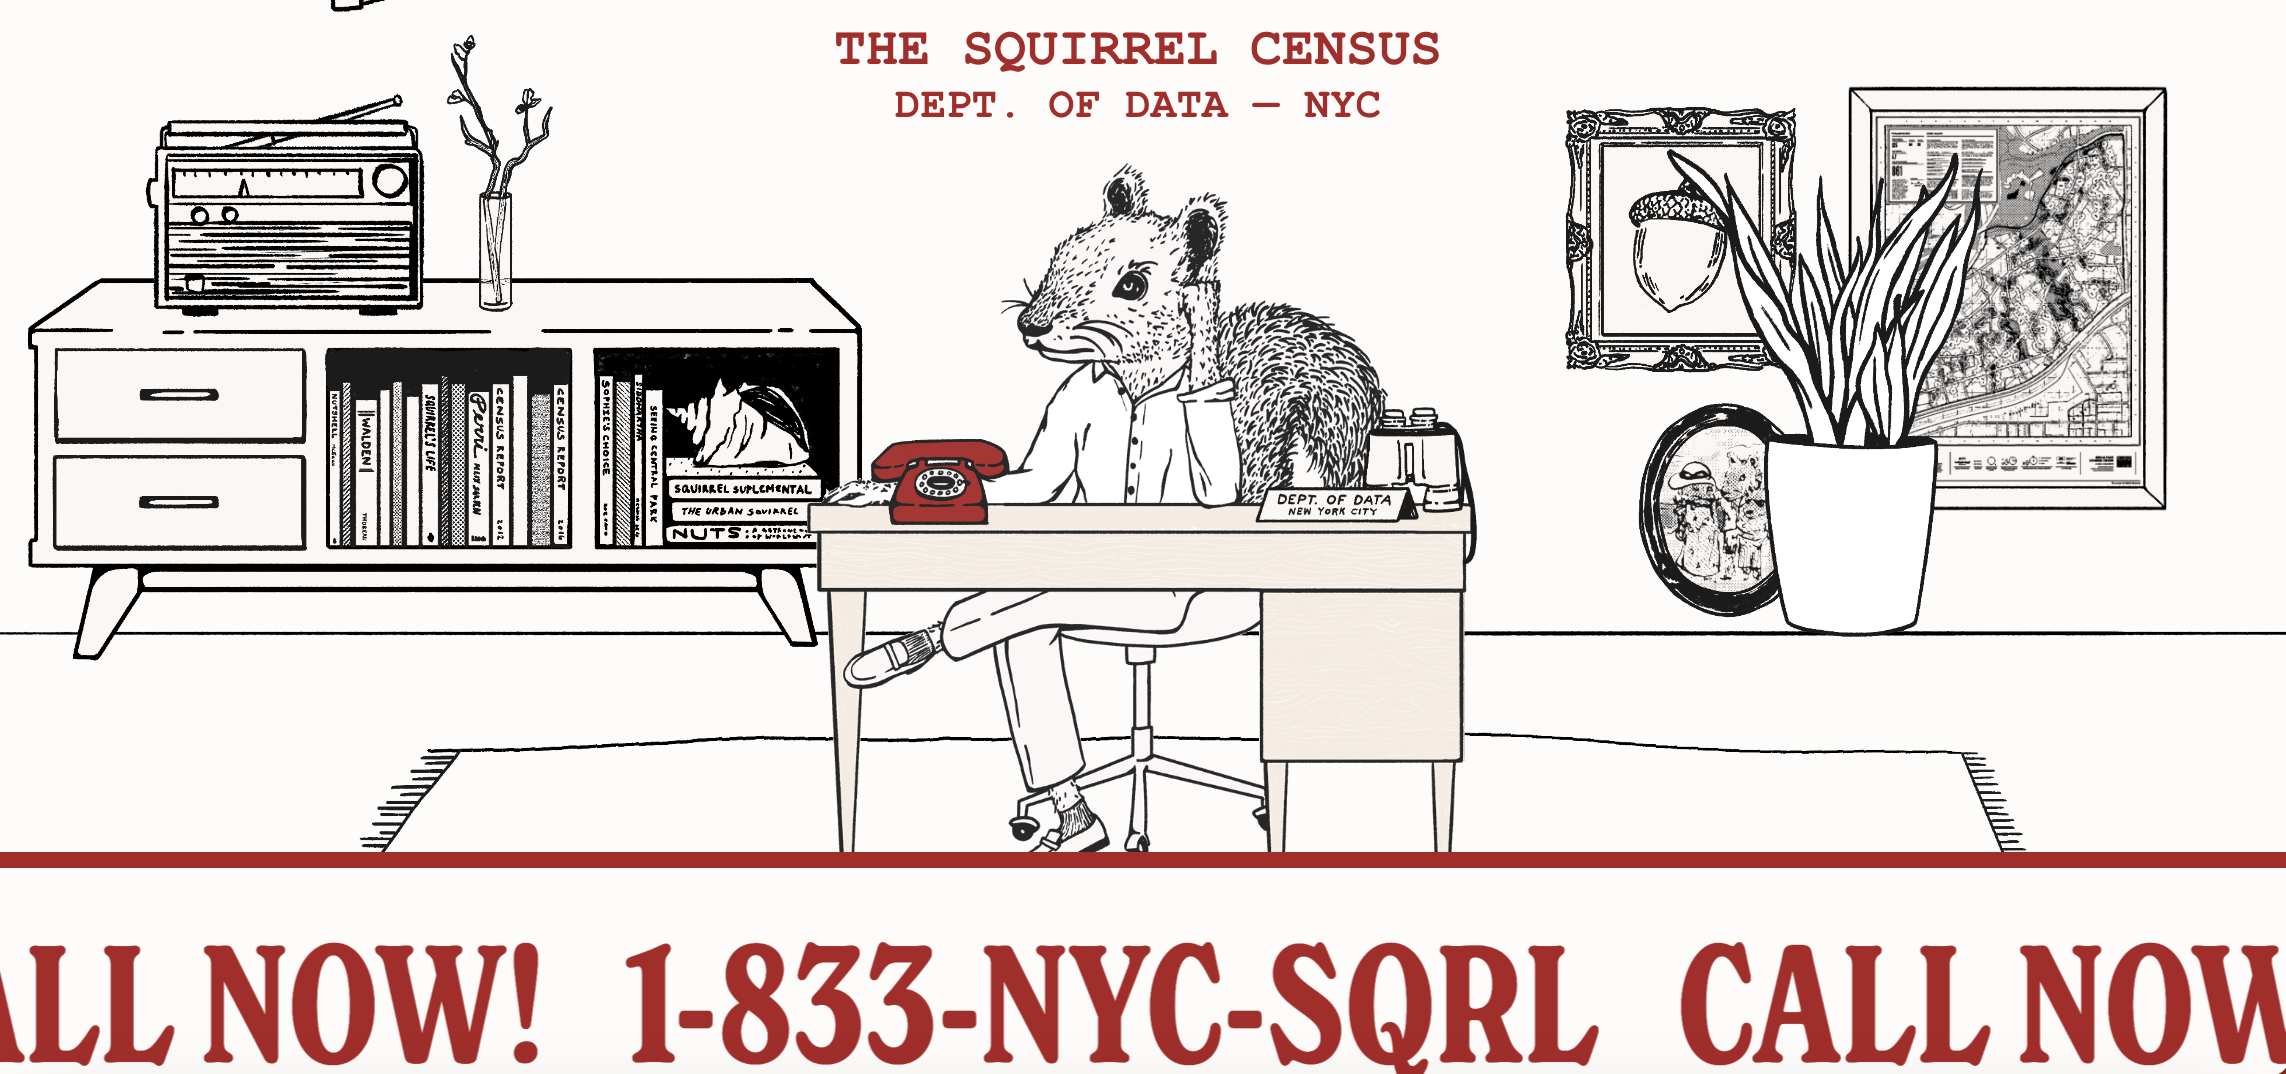

Font: https://www.thesquirrelcensus.com/


### Importa les Dades

In [ ]:
import requests
import pandas as pd
import io

url = "https://raw.githubusercontent.com/rfordatascience/tidytuesday/master/data/2019/2019-10-29/nyc_squirrels.csv"
response = requests.get(url)

if response.status_code == 200:
    print("Download successful")
else:
    print("Failed to download file")

# Convert the response content to a file-like object
file_object = io.BytesIO(response.content)

# Read the CSV content using Pandas
df = pd.read_csv(file_object)
df.head(2)

Download successful


,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
0,-73.956134,40.794082,37F-PM-1014-03,37F,PM,10142018,3,NaN,NaN,NaN,...,False,False,False,NaN,POINT (-73.9561344937861 40.7940823884086),NaN,19,4,19,13
1,-73.957044,40.794851,37E-PM-1006-03,37E,PM,10062018,3,Adult,Gray,Cinnamon,...,False,False,True,me,POINT (-73.9570437717691 40.794850940803904),NaN,19,4,19,13


## Explora les dades

1. Quantes observacions d'esquirols han fet els voluntaris?
2. Quan es va fer la primera i útima observació?
3. Alguns esquirols s'han observat diverses vegades. Deixa només la primera observació per esquirol. Quants esquirols únics s'han observat?  
4. De quin color són la majoria dels esquirols
5. Quina edat tenen la majoria dels esquirols?
6. Selecciona els últims 20 esquirols observats d'edat adulta.
7. Fem servir la selecció de la pregunta anterior, visualitza els esquirols en el mapa de Nova York.


### Pregunta 1

In [ ]:
df.shape

(3023, 36)

### Pregunta 2

In [ ]:
df['date'] = pd.to_datetime(df['date'], format='%m%d%Y')
df = df.sort_values(by='date', ascending=False)
df.head(1)

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
2452,-73.975611,40.769653,5D-AM-1020-03,05D,AM,2018-10-20,3,Adult,Cinnamon,Black,...,True,False,False,NaN,POINT (-73.9756105226696 40.7696531972655),NaN,19,4,19,13


In [ ]:
df.tail(1)

,long,lat,unique_squirrel_id,hectare,shift,date,hectare_squirrel_number,age,primary_fur_color,highlight_fur_color,...,approaches,indifferent,runs_from,other_interactions,lat_long,zip_codes,community_districts,borough_boundaries,city_council_districts,police_precincts
1511,-73.973388,40.768308,5G-AM-1006-01,05G,AM,2018-10-06,1,Adult,Gray,Black,...,False,False,False,made eye contact with me,POINT (-73.9733882364574 40.7683078706597),NaN,19,4,19,13


### Pregunta 3

In [ ]:
df = df.drop_duplicates('unique_squirrel_id', keep='first')
df.shape

(3018, 36)

### Pregunta 4

<Axes: >

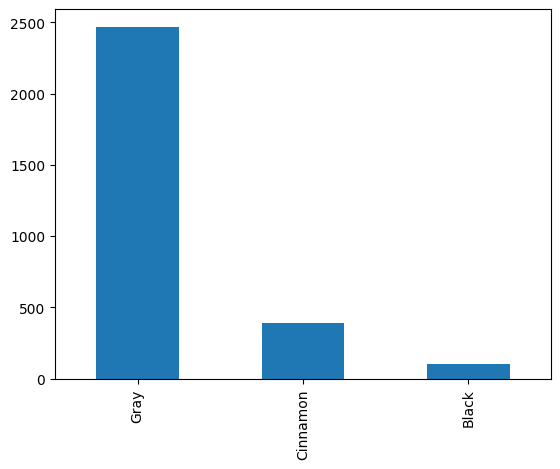

In [ ]:
df['primary_fur_color'].value_counts().plot(kind='bar')

### Pregunta 5

<Axes: >

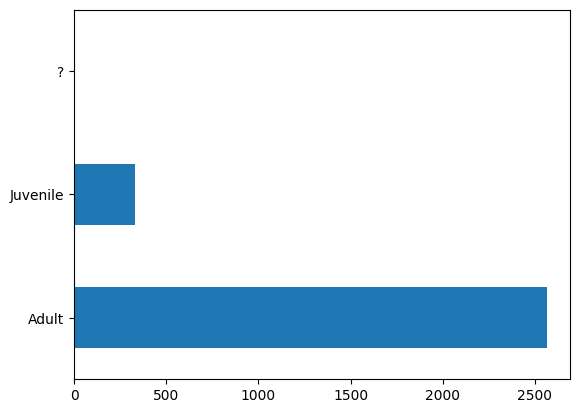

In [ ]:
df['age'].value_counts().plot(kind='barh')

### Pregunta 6

In [ ]:
df_adults = df[df['age']=='Adult'][:20]

### Pregunta 7

In [ ]:
# https://python-visualization.github.io/folium/version-v0.14.0/index.html
import folium

# Create a map centered in New York
map = folium.Map(location=[40.7826, -73.9656], zoom_start=12)

# Add a marker to the map
df_adults.apply(lambda row: folium.Marker(location=[row["lat"], row["long"]]).add_to(map), axis=1)
map

### Ara et toca a tu!

* Afegeix un pin amb les coordenades de l'Estàtua de la Llibertat.
* Canvia el color del pin i fes-lo vermell.
* Canvia el tipus de mapa perquè es vegi en blanc i negre.
* Descobreix com guardar el mapa com a fitxer html i descarrega-te'l.

